In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\ujwal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel("Data/Final_Train.xlsx")

In [3]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
temp_cols  = ["Qualification","Experience","Rating","Place","Profile"]
for item in temp_cols:
    print("Column {} has {} unique values".format(item,data[item].nunique()))

Column Qualification has 1420 unique values
Column Experience has 64 unique values
Column Rating has 51 unique values
Column Place has 877 unique values
Column Profile has 6 unique values


## Preprocessing 

In [6]:
data = data[['Qualification', 'Profile', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating','Fees']]

In [7]:
data["Experience"] = data['Experience'].str.replace('years experience', '').astype(int)

In [8]:
data.head()

,Qualification,Profile,Experience,Place,Miscellaneous_Info,Rating,Fees
0,"BHMS, MD - Homeopathy",Homeopath,24,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100%,100
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,12,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",98%,350
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,9,"Mathikere - BEL, Bangalore",NaN,NaN,300
3,"BSc - Zoology, BAMS",Ayurveda,12,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",NaN,250
4,BAMS,Ayurveda,20,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",100%,250


In [9]:
import re


In [10]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text
data['Qualification'] = data['Qualification'].apply(clean_text)

In [11]:
data['Rating'].fillna('0%', inplace=True)


def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

data['Rating'] = data['Rating'].apply(clean_rating)
data['Rating'] = data['Rating'].astype(int)

In [12]:
data.drop(columns = 'Miscellaneous_Info', inplace = True, axis = 1)

In [15]:
data['Place'].fillna('missing, missing', inplace = True)
place_split = data['Place'].str.split(', ', expand = True)
data['Area'] = place_split[0]
data['City'] = place_split[1]
data.drop(columns = 'Place', axis =1, inplace = True)

In [22]:
data['City'].replace({'Sector 5':'Delhi'}, inplace = True)
data['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
missing                 25
Name: City, dtype: int64

In [24]:
train = pd.get_dummies(data ,columns= ['Profile','City'])

In [25]:
train.head()

,Qualification,Experience,Rating,Fees,Area,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_missing
0,bhms md homeopathy,24,100,100,Kakkanad,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,bams md ayurveda medicine,12,98,350,Whitefield,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,0,300,Mathikere - BEL,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,bsc zoology bams,12,0,250,Bannerghatta Road,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,bams,20,100,250,Keelkattalai,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<Figure size 1440x1080 with 0 Axes>

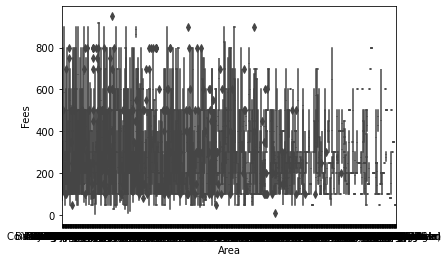

<Figure size 1440x1080 with 0 Axes>

In [29]:
sns.boxplot(x = 'Area', y = 'Fees', data = train)
plt.figure(figsize = (20,15))

In [28]:
train['Area'].value_counts()

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Sukh Vihar           1
Rohini Sector 15     1
Nanjundapuram        1
Satya Niketan        1
Subzi Mandi          1
Name: Area, Length: 867, dtype: int64